# Gráficos e cálculos - lista 1 (Mecânica Estatística)
### Autor: Felipe Reibnitz Willemann

In [1]:
# importanto pacotes:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.linalg as linalg

Questão 6:
=========

Um gás contém frações $n_{A}$ e $n_{B}$ de partículas dos tipos *A* e *B*, cujas energias estão associadas a distribuições $P_{A}(E)$ e $P_{B}(E)$, com $0 \leqslant E \leqslant E_{0}$. Dado que uma partícula tem energia maior que $E_0$, determine a probabilidade de que se trate de uma partícula do tipo A.

---
Código do gŕafico das distribuições de energias das partículas:

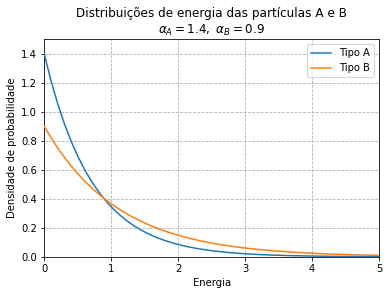

In [2]:
# parâmetros:
alpha_A = 1.4
alpha_B = 0.9

# calculando os pontos que seram plotados:
E = np.linspace(0, 5, 50)
dist_A = alpha_A*np.exp(-alpha_A*E)
dist_B = alpha_B*np.exp(-alpha_B*E)

# plot dos gráficos e seus elementos:
plt.plot(E, dist_A, E, dist_B, zorder=4) 
plt.xlim([0, 5]) 
plt.ylim([0, 1.5]) 
plt.title('Distribuições de energia das partículas A e B\n' + r'$\alpha_A=%.1f,\ \alpha_B=%.1f$' %(alpha_A, alpha_B)) 
plt.xlabel('Energia') 
plt.ylabel('Densidade de probabilidade') 
plt.legend(['Tipo A', 'Tipo B', 'Et'])
plt.grid(axis='both', ls='--', zorder=1)
plt.show()

-----------------------
Código usado para calcular o teste feito com distriuições exponenciais:

In [3]:
# número de partículas, frações dos tipos A e B e energia:
N = 1000
n_A = 0.65
n_B = 1 - n_A
E_0 = 1.1

# lista onde vão ser guardados as P(A|E>=E_0):
prob = []

# cálculo de 10000 P(A|E>=E_0):
for i in range(10000):
    # séries de pandas com as energias das partículas dos tipos A e B: 
    part_A = np.random.exponential(1/alpha_A, int(N*n_A))
    part_B = np.random.exponential(1/alpha_B, int(N*n_B))
    
    # número de partículas com energia E >= E_0:
    num_A = sum(part_A >= E_0)
    num_B = sum(part_B >= E_0)
    
    # cálculo de P(A|E>=E_0):
    prob.append(num_A/(num_A+num_B))

# resultado exato para o cálculo analítico:
resultado_exato = 1/(1+n_B*np.exp(E_0*(alpha_A-alpha_B))/n_A)

# parâmetros do ajuste gaussiano para a distribuição das P(A|E>=E_0):
(mu, sigma) = stats.norm.fit(np.array(prob))

print(f'resultado exato  = {np.around(resultado_exato, 5)} \
      \nresultado do fit = {np.around(mu, 5)} \
      \ndesvio padrão    = {np.around(sigma, 5)}')

resultado exato  = 0.51725       
resultado do fit = 0.51725       
desvio padrão    = 0.02547


--------------------
### Código do histrograma de P(A|E>=E_0):

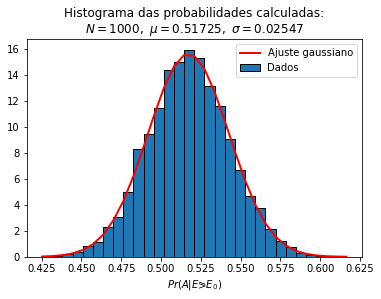

In [4]:
# construção do histograma:
count, bins, ignored = plt.hist(prob, 30, histtype='bar', ec='black', density=True)

# plot do ajuste gaussiano:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2)),
         linewidth=2, color='r')

# elementos do histograma:
plt.title('Histograma das probabilidades calculadas:\n' + r'$N=%.0f,\ \mu=%.5f,\ \sigma=%.5f$' %(N, mu, sigma)) 
plt.xlabel(r'$Pr(A|E \eqslantgtr E_0)$')
plt.legend(['Ajuste gaussiano', 'Dados'])
plt.show()

Questão 8:
=========

Uma das mais ativas e inusuais aplicações de ensembles é a teoria das matrizes aleatórias, utilizada para descrever fenômenos em física nuclear, mecânica quântica mesoscópica e sistemas oscilatórios. A origem da teoria de matrizes aleatórias está na tentativa de descrever a estatística dos níveis de energia de núcleos. Surpreendentemente, o comportamento estatístico de muitos sistemas que exibem fenômenos aleatórios complexos envolvendo autovalores e autoestados pode ser modelado quantitativamente utilizado ensembles de matrizes com elementos completamente aleatórios e não correlacionados. O ensemble de matrizes mais explorado é o ensemble gaussiano ortogonal (GOE). Para gerar um membro **H** desse ensemble, que corresponde a uma matriz simétrica N × N , são necessárias duas etapas:

- Gerar uma matriz N × N cujos elementos sejam números aleatórios gaussianos independentes com média zero e desvio padrão σ = 1;
- Tomar a média de cada matriz com sua transposta para obter uma matriz simétrica.

Uma das propriedades mais notáveis que grandes matrizes aleatórias compartilham é
a distribuição dos espaçamentos entre níveis.

(a) Gere um ensemble com M = 10 000 matrizes GOE de tamanhos N = 2, 4 e 10. Para cada matriz, determine os autovalores λ$_n$, ordenados do menor para o maior, e calcule a diferença λ$_{n+1}$ − λ$_n$ entre autovalores consecutivos com n = N/2 (utilizar as diferenças entre todos os autovalores consecutivos distorceria um pouco a distribuição e dificultaria a visualização nas próximas etapas). Para cada valor de N , trace histogramas do espaçamento entre autovalores dividido pelo valor médio desses espaçamentos, utilizando caixas de largura suficientemente pequena para conseguir observar algumas flutuações. Você deve observar uma queda na altura dos histogramas quando o espaçamento tende a zero, que caracteriza o que se chama de repulsão entre níveis.

------
Cálculo dos $\Delta\lambda$ para as matrizes simétricas com elementos aleatórios associados à uma distribuição gaussiana de média 0 e desvio padrão 1. Esse foi o código usado:

In [5]:
# constantes a serem usadas
M = 10000
delta_lambda_normalizado = {}

for N in [2, 4, 10]:
    delta_lambda = []
    for i in range(M):
        # matriz NxN gaussiana aleatória
        m = np.random.normal(0, 1, (N, N))

        #cálculo dos autovalores para a média da matriz com a sua transposta:
        autovalores = linalg.eigvals((m+m.T)/2)
        autovalores.sort()
        delta_lambda.append(linalg.norm(autovalores[int(N/2)] - autovalores[int(N/2) - 1]))

    # então tomamos uma normalização dos dados pela média
    media = np.array(delta_lambda).mean()
    delta_lambda_normalizado[N] = np.array(delta_lambda)/media

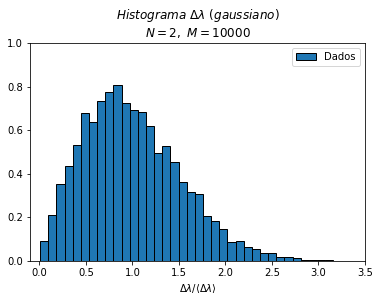

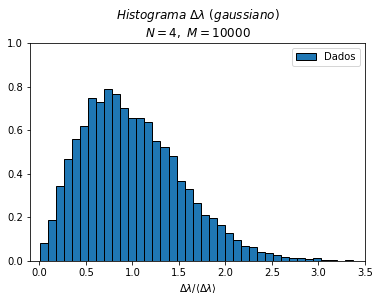

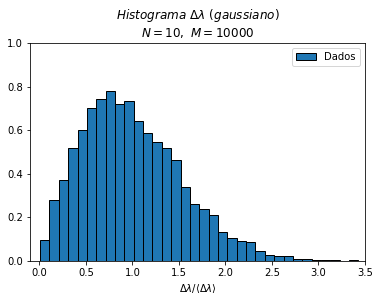

In [6]:
for N in [2, 4, 10]:
    # construção do histograma:
    count, bins, ignored = plt.hist(delta_lambda_normalizado[N], 40, histtype='bar', ec='black', density=True)

    # elementos do histograma:
    plt.title(r'$Histograma\ \Delta\lambda\ (gaussiano)$'+'\n'+'$N=%.0f,\ M=%.0f$' %(N, M))
    plt.legend(['Dados'])
    plt.xlabel(r'$\Delta\lambda/\langle\Delta\lambda\rangle$')
    plt.xlim(-0.1, 3.5)
    plt.ylim(0, 1)
    plt.show()

---
(g) Repetição do item (a) mas para matrizes simétricas com elementos aleatórios $\pm 1$

In [7]:
# constantes a serem usadas:
M = 10000
delta_lambda_normalizado = {}

for N in [2, 4, 10]:
    delta_lambda = []
    for i in range(M):
        # matriz simétrica aleatória:
        m = np.random.randint(0, 2, (N,N))*2 - 1
        m_sym = (m + m.T)/2

        # randomizando os elementos que ficaram nulos depois da média, e mantendo a simetria:
        for i in range(len(m_sym)):
            for j in range(i+1, len(m_sym)):
                if m_sym[i][j] == 0:
                    n = np.random.randint(0, 2)*2 - 1
                    m_sym[i][j], m_sym[j][i] = n, n

        # cálculo dos autovalores:
        autovalores = linalg.eigvals(m_sym)
        autovalores.sort()
        delta_lambda.append(linalg.norm(autovalores[int(N/2)] - autovalores[int(N/2) - 1]))

    # média e normalização:
    media = np.array(delta_lambda).mean()
    delta_lambda_normalizado[N] = np.array(delta_lambda)/media

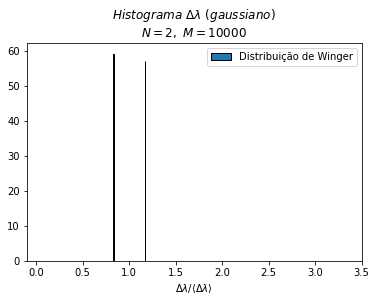

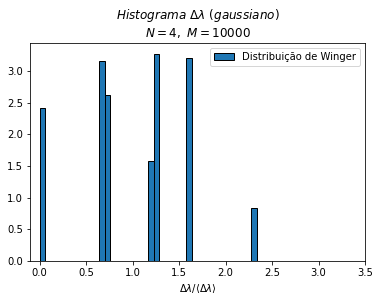

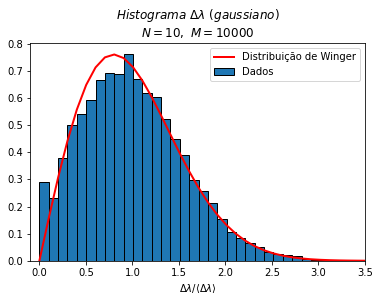

In [8]:
for N in [2, 4, 10]:
    # construção do histograma:
    count, bins, ignored = plt.hist(delta_lambda_normalizado[N], 40, histtype='bar', ec='black', density=True)

    # função a ser ajustada para N = 10:
    if N == 10:
        winger = np.pi * bins * np.exp(- np.pi * bins ** 2 / 4) / 2
        plt.plot(bins, winger, linewidth=2, color='r')

    # elementos do histograma:
    plt.title(r'$Histograma\ \Delta\lambda\ (gaussiano)$' + '\n' + r'$N=%.0f,\ M=%.0f$' %(N, M))
    plt.legend(['Distribuição de Winger','Dados'])
    plt.xlabel(r'$\Delta\lambda/\langle\Delta\lambda\rangle$')
    plt.xlim(-0.1, 3.5)
    plt.show()